# _HDIP Data Analytics_ 

### Data Visualization Techniques  
Lecturer(s): David McQuaid 

Submission Deadline Date: 20/10/2023 11:55pm  

Student: **_Bárbara Abreu Costa 2023099_**

GitHub Repository: https://github.com/Babreucosta/CA1_DataVisTech.git

*******

### Scenario:  
  
_You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season._
  
_Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python._ 
   
_The companies CTO also requires you to rationalize all the decisions that you have made in your report._  
  
_This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant._



### Requirements  
  
_You are required to use the dataset contained within the file “board_games.csv” and then answer the following questions:_
  
###### Part 1: (Column Names are denoted by quotation marks)  (30 marks)
  
_•	What are the top 5 “average rated” games?  
•	Is there a correlation between the “users_rated” and the “max_playtime”?  
•	What is the distribution of game categories? (You may not use a barchart)
•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  
•	What are the 5 most common “mechanics” in the dataset?_ 

###### Part 2  (20 marks)
  
_•	You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario._

###### Part3:  (50 marks)
  
_You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)_
  
_All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).  You must also provide a PDF copy of your Jupyter Notebook for dissemination._  



### Data Dictionary


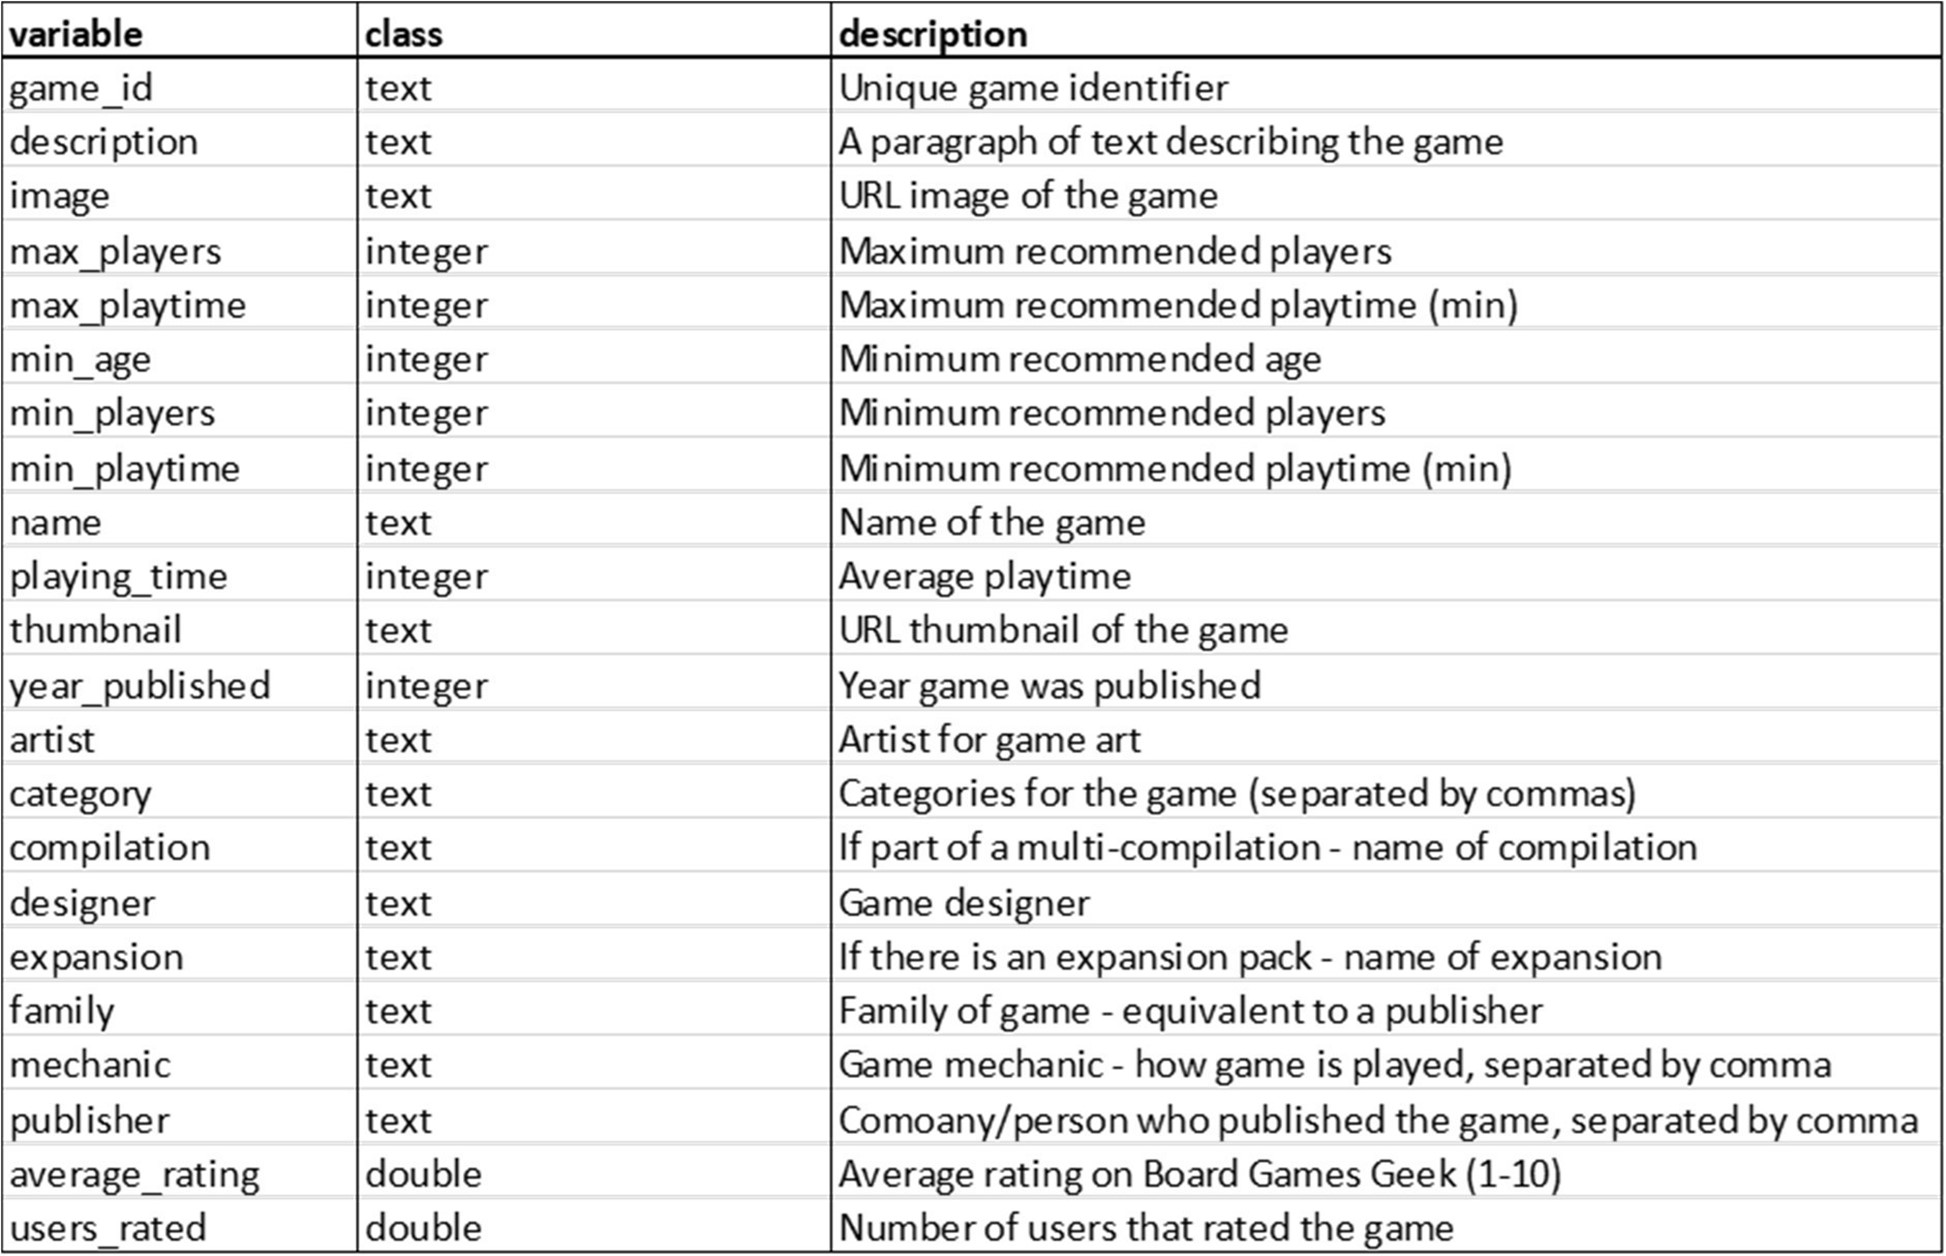

In [1]:
from IPython.display import Image
image_path = 'dictionary.jpg' 
Image(filename=image_path)

*******

# _BOARD GAMES_

    To conduct this analysis I decided to structure an approach starting with an general undertanding of the data. That initial stage will involve loading the dataset, its structure to well undertanding and check if there is any missing values. Where appropriate, I'll also trying to engineer features that can improve the dataset.

In [2]:
import pandas as pd
import numpy as np

##### Load the dataset

In [3]:
board_games = pd.read_csv('board_games.csv')
board_games.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


##### Understand its structure

In [4]:
board_games.shape

(10532, 22)

In [5]:
board_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

##### Check for missing values

In [6]:
board_games.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

In [7]:
board_games.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [8]:
board_games.describe(include=object) 

,description,image,name,thumbnail,artist,category,compilation,designer,expansion,family,mechanic,publisher
count,10532,10531,10532,10531,7759,10438,410,10406,2752,7724,9582,10529
unique,10528,10527,10357,10527,4641,3860,336,4678,2634,3918,3209,5512
top,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic2410035.png,Robin Hood,//cf.geekdo-images.com/images/pic2410035_t.png,Franz Vohwinkel,"Wargame,World War II","Traveller: The Classic Games, Games 1-6+",(Uncredited),"Règlement de l'An XXX,Regulations of the Year ...",Crowdfunding: Kickstarter,Hex-and-Counter,GMT Games
freq,3,2,5,2,166,449,8,558,7,391,523,180


##### Exploratory Data Analysis (EDA):
    
    - Understand the distribution of key variables.
    - Identify any trends or patterns in the data.
    - Visualize summary statistics.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

    Distribuition of user ratings

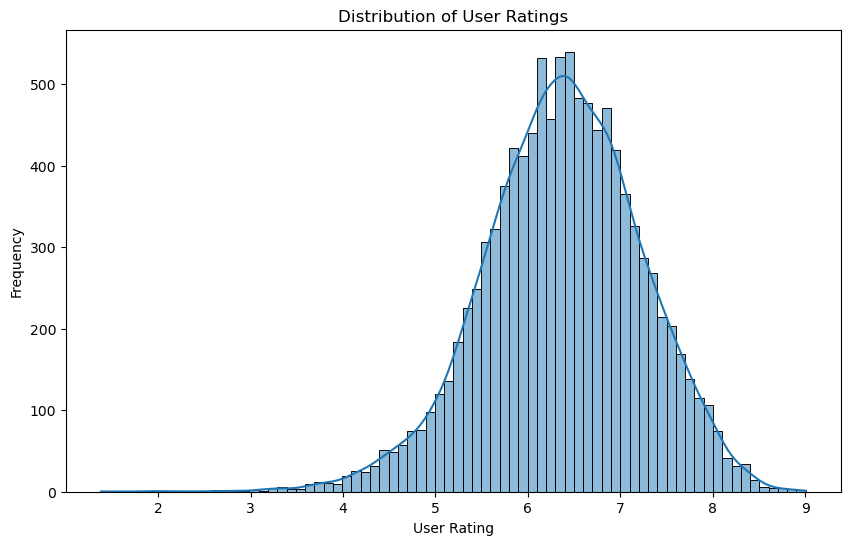

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(board_games['average_rating'], kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

##### Feature Selection:

    - Identify the key features that are relevant for the analysis. This may include attributes like game category, price, user ratings, etc.

In [11]:
selected_features = ['category', 'price', 'user_rating']

--------

#####  •  What are the top 5 “average rated” games?  

In [12]:
top_rated_games = board_games.sort_values(by='average_rating', ascending=False).head(5)
top_rated_games[['name', 'average_rating']]

,name,average_rating
8348,Small World Designer Edition,9.00392
6392,Kingdom Death: Monster,8.93184
9964,Terra Mystica: Big Box,8.84862
8526,Last Chance for Victory,8.84603
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",8.83081


     Above we have a table with the names of the top 5 games
     
        To find the games with the highest average ratings I decided to order the dataset by 'average_rating' in descending order. The names and ratings are displayed toghether to give a clear and concise piscture of the best-rated game - Small World Designer Edition.
        By the result, stakeholders will be able to essily see which game have the highest average ratings, which can be helpful when deciding which titles to emphasize in the sales plan.

##### • Is there a correlation between “users_rated” and “max_playtime”?

    The Pearson correlation coefficient can be calculated to see if "users_rated" and "max_playtime" are correlated or not. The Pearson correlation coefficient calculates how linearly two variables are related.

In [13]:
correlation = board_games['users_rated'].corr(board_games['max_playtime'])
print(correlation)

-0.004341647333776705


In [14]:
# add explanation

#####  •  What is the distribution of game categories? (You cannot use a bar chart or pizza)

##### • Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

    To determine if older games (released in 1992 and earlier) have a higher median "average rating" than newer games I will fisrt split the data

In [15]:
older_games = board_games[board_games['year_published'] <= 1992]
newer_games = board_games[board_games['year_published'] > 1992]

    Find the median "average rating" for each group.

In [16]:
median_rating_older = older_games['average_rating'].median()
median_rating_newer = newer_games['average_rating'].median()

    Compare the Medians

In [17]:
median_rating_older, median_rating_newer

(6.08812, 6.462915)

    By comparing the median average ratings of older and newer games, we can gain insights into whether there is a trend in ratings based on the release year. This analysis can help inform decisions about which types of games may be more popular or well-received by the audience.
    As it shows in the result the median rating for older games (released in 1992 and earlier) is approximately 6.08812, compared the median rating for newer games (released after 1992) is approximately 6.462915. So that suggest in general newer games have a litlle higher median rating than older games. 
    It's crucial to remember that the difference between the median is quite small (under 0.4) - indicating that there MAY NOT be much of a substatial diffference in the overall quality or popularity among them.
    In the bussiness point of view I would say based on the generally positive ratings both have that there is potetial for sale.

##### • What are the 5 most common “mechanics” in the dataset?  

    As we know from the previews output "mechanic" has 950 missing values. So I have decided replace NA values as "Not Mentioned".

In [22]:
board_games["mechanic"] = board_games["mechanic"].fillna("Not Mentioned")

    That collumn also have other particularites as a list of string values, values separeted by "," and "/". To exclued these I will be cleaning and forming a tokenized value.

In [26]:
import re

def Clean(Text):
    sms = re.sub('[^a-zA-Z], ,', ' ', str(Text))
    sms = sms.replace("/",",")
    sms = sms.split()
    sms = ' '.join(sms)
    return sms
board_games["mechanic"] = board_games["mechanic"].apply(Clean)

print("First three values of Mechanics after cleaning text:")
print(board_games["mechanic"][:3], "\n")

First three values of Mechanics after cleaning text:
0    Area Control , Area Influence,Auction,Bidding,...
1                                         Trick-taking
2    Area Control , Area Influence,Hand Management,...
Name: mechanic, dtype: object 



    Count the frequency of each game mechanic

In [25]:
common_mechanics = board_games['mechanic'].value_counts().head(5)
print("The 5 most common “mechanics” in the dataset are:")
common_mechanics

The 5 most common “mechanics” in the dataset are:


Not Mentioned           950
Hex-and-Counter         523
Hand Management         297
Dice Rolling            222
Roll , Spin and Move    199
Name: mechanic, dtype: int64

    This information will may help stakeholders understand which game mechanics are most commonly associated with the board games. This knowledge can be valuable for making decision related to game selection and marketing strategies. 

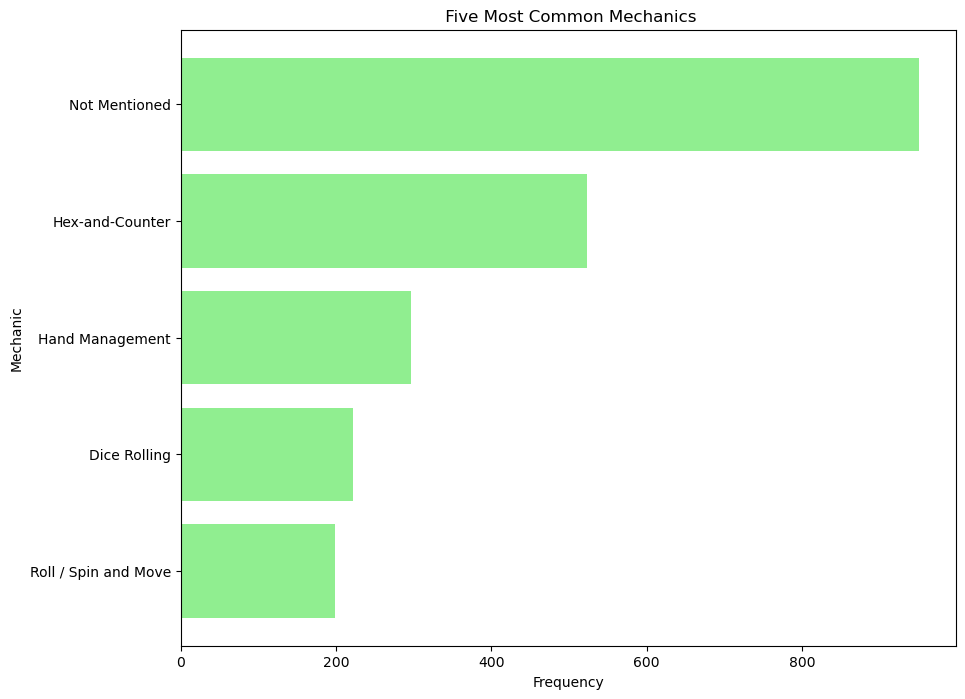

In [20]:
import matplotlib.pyplot as plt

# Count the frequency of each game mechanic
common_mechanics = board_games['mechanic'].value_counts().head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(common_mechanics.index, common_mechanics.values, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Mechanic')
plt.title(' Five Most Common Mechanics')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# PART 2

##### •	You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.

In [27]:
# Possible question 1: Is there any statistically signicant relationship btw the "avarege rating" and the "playing time" of bord games?

# PART 3

##### • You must explain, in detail why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)

##### • Why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)



##### • What design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)


##### • What your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)